# Reto del Titanic
### Carga de librerías y datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
#import polars as pl

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df = pd.concat([train, test],ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Analisis exploratorio y limpieza de datos.

In [3]:
#train.head()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Se empezará analizando los valores nulos de los datos

In [5]:
print("Valores nulos Train:\n", df.isnull().sum())

Valores nulos Train:
 PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [6]:
print("Valores nulos Test\n", test.isnull().sum())

Valores nulos Test
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Se puede apreciar que los datos con mayor cantidad de valores nulos son la edad (Age) y la cabina (Cabin). 

Debido a que los valores de cabina son los que mayor cantidad de nulos tienen y sería más difícil *rellenar*, por lo que se decidió retirar dichos datos.

También se retiraron los identificadores (Passenger ID) ya que son variables independientes que solamente llevan el registro de la base de datos.

In [7]:
train = train.drop(["Cabin","PassengerId"],axis=1)
test = test.drop(["Cabin","PassengerId"],axis=1)
df = df.drop(["Cabin", "PassengerId"],axis=1)

A partir de ahora solo se tomarán en cuenta los datos de entrenamiento, puesto que si se tienen que realizar adecuaciones en los de prueba se podrán realizar más adelante.

In [8]:
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [9]:
df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          1
Embarked      2
dtype: int64

Se puede notar que hay 2 datos faltantes en el puerto de embarcamiento (Embarked), por lo que se tiene que pensar en qué es lo que se puede hacer para poder *completarlos*. 

Observando una gráfica de éstos valores:

In [10]:
"""
plt.figure(figsize=(6, 7))
sns.countplot(x='Embarked', data=train)
"""
fig=px.histogram(df, x="Embarked")#, color="Sex"
fig.show()

Se puede notar que la moda de esta variable categórica es la S, por lo que a los valores nulos les daremos dicho valor para mantener la coherencia de los datos.

https://nicolasurrego.medium.com/tratamiento-de-valores-vac%C3%ADos-ii-estrategias-de-imputaci%C3%B3n-estad%C3%ADstica-moda-mediana-y-media-2665b0f53a4c

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

Ahora regresamos a la variable de edad, donde tendremos que resolver los 177 datos faltantes que presenta.

Se volverá a realizar una gráfica, de forma que se decida cuál es la mejor forma de sustituir los datos faltantes.

In [12]:
#px.histogram(df, x="Age", color="Survived")
px.histogram(df, x="Age")

<Axes: xlabel='Age', ylabel='Count'>

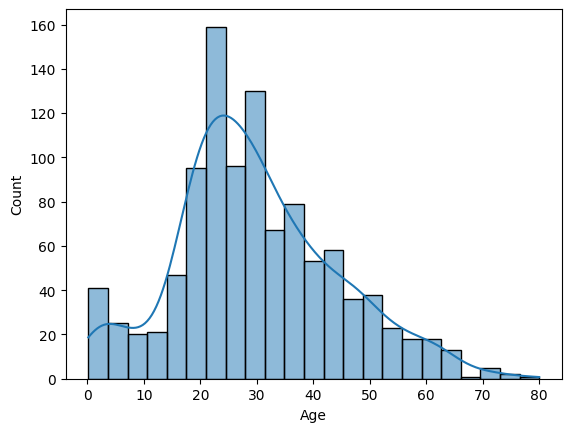

In [13]:
sb.histplot(df['Age'], kde=True)

Se consideró probar la mediana o la media móvil para llenar los vacíos, sin embargo, se pude utilizar otro dato para poder aproximar la edad de una mejor manera.

Se pretende hacer uso de los títulos de las personas para darles una medida, es decir, si una persona tiene el título Mr y no tiene edad, se usará la media móvil de las personas con ese título.

A continuación se procede a hacer la obtención del título para posteriormente realizar lo mencionado anteriormente.

In [14]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\.', expand=False)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

Para decidir qué medida se utilizará, se realizará una visualización de histogramas de las edades de los 17 títulos para decidir si usar media o mediana. Considerando también que la media móvil deberá mantenerse como entero.

In [15]:
# Contar las edades faltantes por título
edades_faltantes = df[df['Age'].isnull()].groupby('Title').size().reset_index(name='Missing Count')

fig = px.bar(edades_faltantes, x='Title', y='Missing Count', 
             title='Número de Edades Faltantes por Título', 
             labels={'Title': 'Título', 'Missing Count': 'Cantidad de Edades Faltantes'},
             text_auto=True)

# Mostrar el gráfico
fig.show()

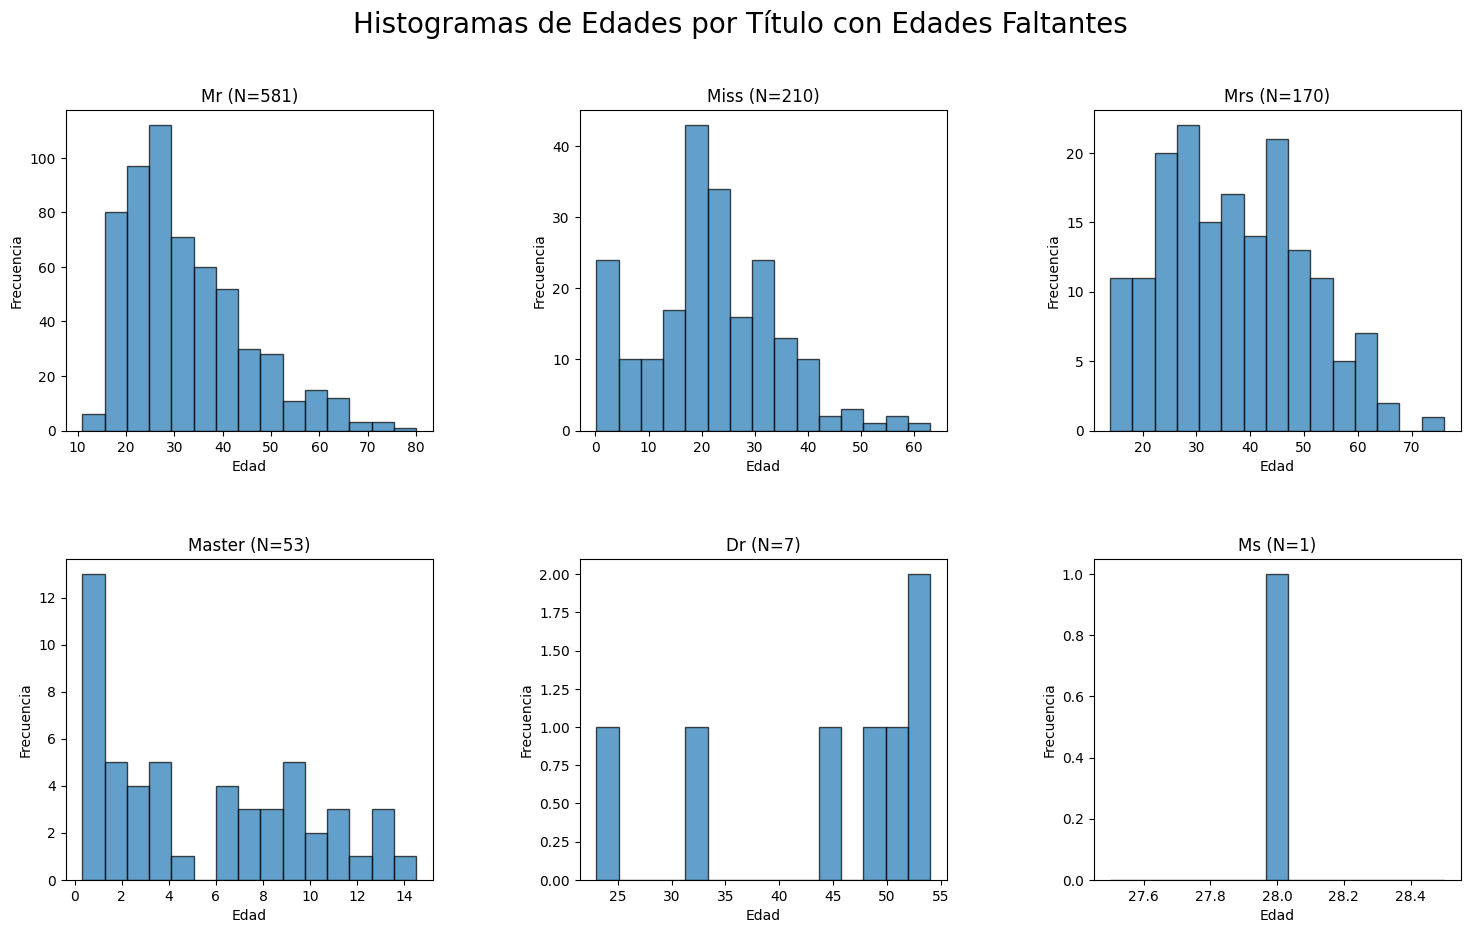

In [16]:
# Títulos con valores faltantes
titulos_con_faltantes = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Ms']

plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Histogramas
for i, titulo in enumerate(titulos_con_faltantes):
    plt.subplot(2, 3, i+1) 
    subset = df[(df['Title'] == titulo) & (df['Age'].notnull())]['Age']  # Filtrar las edades no nulas
    plt.hist(subset, bins=15, edgecolor='black', alpha=0.7)  # Histograma
    plt.title(f'{titulo} (N={len(subset)})')  # Título del subplot con la cantidad de datos
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')

# Título general del gráfico
plt.suptitle('Histogramas de Edades por Título con Edades Faltantes', fontsize=20)
plt.show()

En todos los títulos en los que hay edades faltantes, los datos no siguen una distribución normal, por lo que el uso de la media podría implicar la creación de datos sesgados. 

Se procederá a hacer el llenado de los datos vacíos haciendo uso de la mediana, puesto que esta medida permitirá que los valores atípicos no sesguen las medidas. Sin embargo, el uso de esta medida se realizará solo en los títulos: Mr, Miss y Mrs, dado que cuentan conn datos suficientes. Para los títulos: Master y Dr se usará una media móvil que se mantenga como un número entero.

In [19]:
# Llenar NaN con la mediana móvil para los títulos Mr, Miss, Mrs
df.loc[df['Title'].isin(['Mr', 'Miss', 'Mrs']), 'Age'] = (
    # Usamos loc para seleccionar filas donde el 'Title' es uno de los indicados (Mr, Miss, Mrs)
    df.groupby('Title')['Age'].transform(  # Agrupamos por 'Title' y aplicamos transform para modificar 'Age'
        lambda x: x.fillna(x.rolling(window=3, min_periods=1).median())  # Usamos lambda para llenar valores nulos con la mediana móvil (ventana de 3)
    )
)

# Llenar NaN con la media móvil para los títulos Master y Dr
df.loc[df['Title'].isin(['Master', 'Dr']), 'Age'] = (
    # Usamos loc para seleccionar filas donde el 'Title' es Master o Dr
    df.groupby('Title')['Age'].transform(  # Agrupamos por 'Title' y aplicamos transform para modificar 'Age'
        lambda x: x.fillna(x.rolling(window=3, min_periods=1).mean())  # Llenamos NaN con la media móvil (ventana de 3)
    )
)

df['Age'] = df['Age'].fillna(df['Age'].mode()[0]) #Llenar la moda de las edades faltantes


In [20]:
df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
Title         0
dtype: int64

In [22]:
px.histogram(df, x="Age")

Ahora que se han completado los datos, se procederá a eliminar los datos que se consideren que no aporten a la predicción.

In [20]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20.5,1,2,W./C. 6607,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


Convertimos en una variable binaria el sexo, para poder utilizar este dato. Male tiene el valor 0 y Female 1.

In [22]:
train['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)

C:\Users\aoran\AppData\Local\Temp\ipykernel_18780\3082083757.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\aoran\AppData\Local\Temp\ipykernel_18780\3082083757.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Al investigar se encontró que ¨Embarked¨ únicamente dice donde se realizó la embarcación, y no parece haber alguna relación interesante, por lo que esta variable se eliminará.

          Survived    Pclass       Sex       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481  0.543351 -0.078813 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.131900 -0.334907  0.083081  0.018443 -0.549500
Sex       0.543351 -0.131900  1.000000 -0.105922  0.114631  0.245489  0.182333
Age      -0.078813 -0.334907 -0.105922  1.000000 -0.261850 -0.187384  0.092735
SibSp    -0.035322  0.083081  0.114631 -0.261850  1.000000  0.414838  0.159651
Parch     0.081629  0.018443  0.245489 -0.187384  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.182333  0.092735  0.159651  0.216225  1.000000


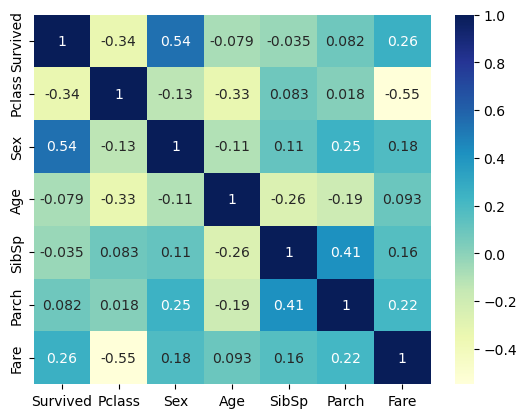

In [25]:
# prints data that will be plotted 
# columns shown here are selected by corr() since 
# they are ideal for the plot 
train['Family'] = train['SibSp'] / train['Parch']
datacorr=train.drop(columns=['Name','Ticket','Embarked','Title'])
print(datacorr.corr()) 
  
# plotting correlation heatmap 
dataplot = sb.heatmap(datacorr.corr(), cmap="YlGnBu", annot=True) 
  
